1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```
In other words:

You have 21 years of annual maxima wind speed data recorded at the Sprogø meteorological station. For these values:
1. Each year's maximum wind speed forms a sample of observed maxima.
2. These observed maxima represent the **empirical distribution** for which you'll estimate the CDF and the quantile function.

The $ p_i $ values give an approximation of the probabilities associated with each measured maximum.
Now, you need to create a smooth quantile function $ Q(p) $ that connects the empirical points $ (p_i, x_i) $, where $ x_i $ is the corresponding wind speed for the cumulative probability $ p_i $. This can be achieved using **interpolation**:

1. Use the `scipy.interpolate` library (e.g., `interp1d`) to create a smooth mapping of \( p \to x \) based on the empirical data \( (p_i, x_i) \).
2. The resulting interpolated function will serve as the quantile function.

In a 50-year period, the maximum wind speed corresponds to the top 2% quantile (\( p = 0.98 \)). Here's why:
- The annual maximum that occurs once every 50 years is equivalent to saying the maximum lies in the top 2% tail for 50 independent years.

Use your interpolated quantile function to compute the wind speed value:
$
Q(0.98)
$

This value represents the estimated maximum wind speed for a 50-year return period.

#### Notice: 1. **Connection Between Return Period and Probability**
The **return period** is the average time interval between events of a certain magnitude. For example, if you're looking for the wind speed expected to occur once every 50 years:
- The **annual probability** of observing such a wind speed or greater is:
  $
  p = \frac{1}{T} = \frac{1}{50} = 0.02
  $
  This means there is a 2% chance of observing a wind speed equal to or greater than this threshold in any given year.

- Conversely, $ 1 - p = 0.98 $ is the cumulative probability that the wind speed will be **less than** this value in any given year.

Thus, finding the wind speed corresponding to a **cumulative probability of 0.98** translates to identifying the wind speed that occurs with a return period of 50 years.

#### 2. **Why Use the Quantile Function?**
The quantile function $ Q(p) $:
- Directly maps a **probability** (e.g., $ 0.98 $) to the corresponding value of the wind speed.
- It is the inverse of the **cumulative distribution function (CDF)**, which describes the proportion of data points that fall below a given wind speed.

Using $ Q(0.98) $, we compute the wind speed that has a **2% probability of being exceeded in any given year** or equivalently, a **50-year return period**.


#### 3. **How the Approach Aligns With the Problem**
- You have observed **21 years of annual maxima** and can estimate the empirical relationship between cumulative probability $ p_i $ and wind speeds $ x_i $.
- Once you interpolate the quantile function $ Q(p) $, you're able to predict the wind speed for any cumulative probability, even those (like $ p = 0.98 $) that aren't directly measured.
- $ Q(0.98) $ gives a prediction of the **maximum wind speed occurring every 50 years**, under the assumption that the same statistical distribution applies.


#### 4. **Why Is This Statistical?**
The prediction relies on the assumption of a **stationary process**, meaning:
- The statistical behavior of annual wind speed maxima doesn't change over time.
- Probabilities derived from 21 years of data represent the broader long-term distribution of maxima.

By using a quantile function fitted to your empirical data, you're leveraging statistical principles to extend your limited observations into a broader prediction.

#### 5. **What Makes $ Q(0.98) $ the Right Threshold?**
- In extreme value analysis, return periods are commonly expressed as **exceedance probabilities**. For a 50-year return period, the exceedance probability is $ p_{\text{exceed}} = 1 - p = 0.02 $.
- The complement $ p = 0.98 $ corresponds to the cumulative probability for the same event.

Computing $ Q(0.98) $ matches this threshold, making it the standard method for return period prediction.

#### About spline
Ah, in the context of splines, **`SP`** refers to **Spline Polynomial**. Specifically:

- **Spline** refers to a piecewise-defined function, usually a polynomial, that provides a smooth approximation to a set of data points.
- **Polynomial** refers to the fact that each segment of the spline is defined by a polynomial equation, commonly of degree 3 (cubic spline) or another specified degree.

In essence, an **SP** (Spline Polynomial) is the mathematical building block of a spline function. When constructing a spline:
- The data is divided into intervals (usually between consecutive data points).
- Each interval is assigned its own polynomial that meets continuity and smoothness conditions at the boundaries (called knots).

This ensures that the spline is smooth and differentiable across its entire domain while providing a flexible approximation of the data.

`UnivariateSpline` is a class provided by the `scipy.interpolate` module in the SciPy library. It is used to perform one-dimensional (univariate) spline interpolation or smoothing. This method fits a smooth curve through given data points, or creates a curve that approximates the data, depending on the specified smoothness criteria. Here's a breakdown of its features:

1. **Interpolation and Smoothing**:
   - If the smoothing factor (`s`) is set to 0, `UnivariateSpline` performs pure interpolation, ensuring that the spline passes through all the provided data points.
   - With a positive smoothing factor, it smooths the data to reduce the effect of noise, trading off exact adherence to data points.

2. **Cubic Splines**:
   - By default, it constructs a cubic spline, which is a piecewise polynomial of degree 3. Higher or lower degrees can be specified with the `k` parameter.

3. **Flexibility**:
   - Allows for non-uniform spacing of data points.
   - Provides control over the tradeoff between data fitting and smoothness via the smoothing factor `s`.

4. **Convenience**:
   - Includes built-in methods to evaluate the spline at specific points, compute derivatives, or integrate over an interval.

##### Parameters:
- `x, y`: The data points through which the spline is fit. They must be sorted in ascending order of `x`.
- `w`: Optional weights for data points. Larger weights imply greater importance of the corresponding data points in determining the spline.
- `bbox`: Boundary of the approximation interval, defaulting to the range of `x`.
- `k`: Degree of the spline (default is 3 for cubic).
- `s`: Smoothing factor. A larger value produces a smoother curve that might not pass through all data points; `s=0` forces interpolation.

`UnivariateSpline` is particularly useful when the data are irregular or noisy, and a smooth model is desired rather than a piecewise constant or linear interpolation.

#### About $ p_i $: 

For a given set of data with $ N $ observations, the formula $ p_i = \frac{i}{N+1} $ assigns a cumulative probability to each data point $ i $ in the sorted dataset:

1. For the **first data point** (smallest value), the cumulative probability will be $ p_1 = \frac{1}{N+1} $.
2. For the **second data point**, the cumulative probability will be $ p_2 = \frac{2}{N+1} $, and so on.
3. Finally, for the **last data point** (the largest value), the cumulative probability will be $ p_N = \frac{N}{N+1} $.

Thus, for the highest value in the dataset (the largest wind speed in your case), the cumulative probability is **slightly less than 1**: $ p_N = \frac{N}{N+1} $.

**Why Not 1?**
- In practice, assigning $ p_N = 1 $ to the largest value would imply that the data includes all possible values below it, which isn’t representative of the empirical data distribution. Using $ p_N = \frac{N}{N+1} $ gives a more accurate estimate of the cumulative probability, ensuring the probability of being below that data point is close to, but not exactly, 1. 

The fraction $ \frac{i}{N+1} $ is used so that the cumulative probabilities distribute smoothly between 0 and just under 1:

- The smallest data point is assigned a probability $ p_1 = \frac{1}{N+1} $, representing the smallest portion of the total.
- The largest data point gets $ p_N = \frac{N}{N+1} $, the largest fraction just below 1.

If the denominator were $ N $ instead of $ N+1 $, we’d get the issue where the cumulative probability for the last point equals exactly 1, which can cause problems when fitting distribution models or performing interpolation.

The predicted maximum wind speed for a 50-year return period is 36.97 m/s.


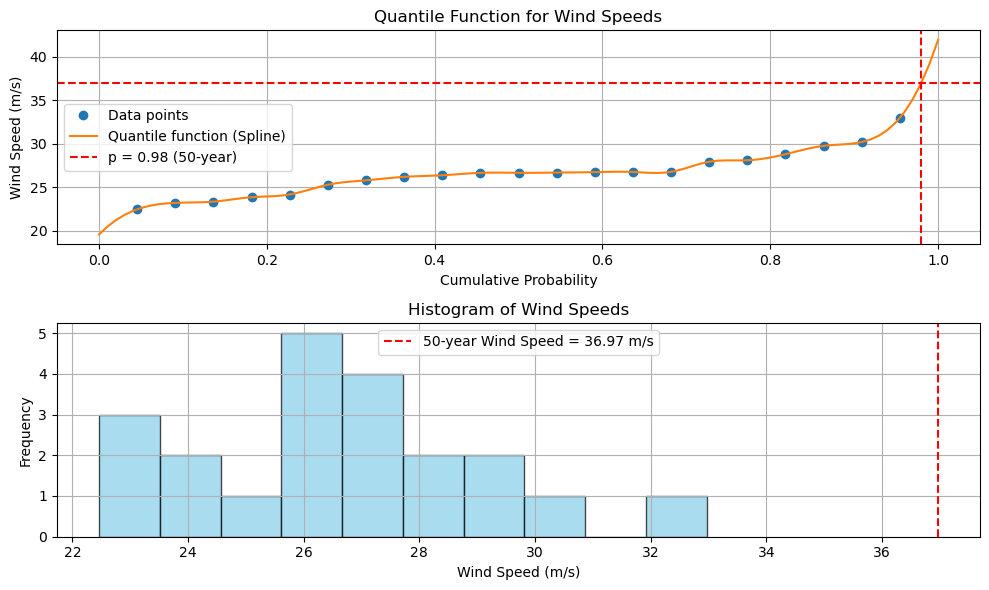

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
max_speeds = np.load('max-speeds.npy')  # Example: [15.1, 14.8, 16.2, ...]
years_nb = max_speeds.shape[0]

# Compute cumulative probabilities (pi = i / (N+1)) --> you want pi to increase with xi (the probability of having a value less or equal than xi must grow as you grow xi)
cprob = [i / (years_nb + 1) for i in range(1, years_nb + 1)] 

# Sort the wind speeds
sorted_speeds = np.sort(max_speeds)
#sorted_speeds = max_speeds #just to try seeing what happens if I do not sort --> you get a non-monotonically increasing function and a wrong result! 

# Define the quantile function using UnivariateSpline
# Fit a smooth spline to cumulative probabilities and sorted wind speeds
quantile_func = UnivariateSpline(cprob, sorted_speeds, k=3, s=0)  # k=3 for cubic spline, s=0 for no smoothing

# Calculate the wind speed for the 50-year return period (upper 2% quantile)
fifty_prob = 1.0 - 0.02
fifty_wind = quantile_func(fifty_prob)
print(f"The predicted maximum wind speed for a 50-year return period is {fifty_wind:.2f} m/s.")

# Plot cumulative probabilities vs. sorted wind speeds
plt.figure(figsize=(10, 6))

# Cumulative probabilities
plt.subplot(2, 1, 1)
plt.plot(cprob, sorted_speeds, 'o', label='Data points')
cprob_range = np.linspace(0, 1, 100)
plt.plot(cprob_range, quantile_func(cprob_range), '-', label='Quantile function (Spline)')
plt.axvline(x=fifty_prob, color='r', linestyle='--', label="p = 0.98 (50-year)")
plt.axhline(y=fifty_wind, color='r', linestyle='--')
plt.xlabel("Cumulative Probability")
plt.ylabel("Wind Speed (m/s)")
plt.title("Quantile Function for Wind Speeds")
plt.legend()
plt.grid()

# Plot the histogram of wind speeds
plt.subplot(2, 1, 2)
plt.hist(max_speeds, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=fifty_wind, color='r', linestyle='--', label=f"50-year Wind Speed = {fifty_wind:.2f} m/s")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Histogram of Wind Speeds")
plt.legend()
plt.grid()

# Display all plots
plt.tight_layout()
plt.show()


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celsius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

When asked to "define a function that can describe min and max temperatures," it means you need to create a mathematical model that captures the general trend or pattern of the temperature extremes over the months. In this case, a sinusoidal function (or a harmonic model) is a natural choice since temperatures often vary seasonally in a predictable, periodic manner.

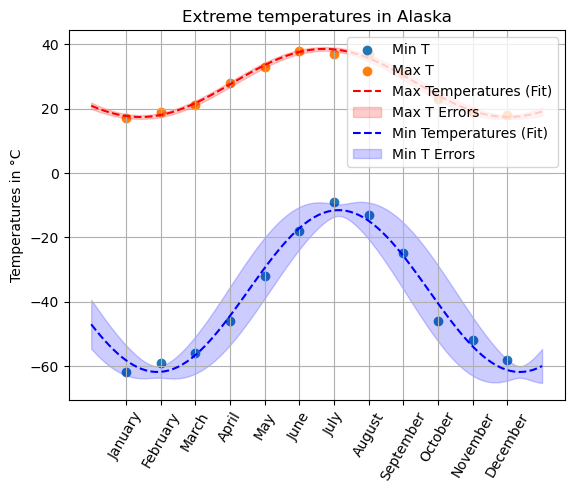

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Data
month = np.arange(1,13)
month_label = month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
max_temp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# Plot these temperature extremes
plt.scatter(month, min_temp, label = 'Min T') # I could also use month_label directly
plt.scatter(month, max_temp, label = 'Max T')
plt.xticks(month,month_label, rotation = 60) #No needed it above used month_label in the x argument of scatter plot
plt.grid()
plt.title('Extreme temperatures in Alaska')
plt.legend(loc = 'upper right')
plt.ylabel('Temperatures in °C')


# Define a function that can describe min and max temperatures
def fitfunc(t, A, t0, P, C): #t is time, p are the parameters
            #A is the aplitude (thermal excursion: half the difference between the max and min temperatures)
            #t0 is a shift to match maximum/minimum position
            #P is the period 
            #C is a vertical shift (average temperature)
    fitfunc = A*np.sin(2*np.pi*(t-t0)/P) + C 
    return fitfunc

# Fit this function to the data with scipy.optimize.curve_fit() --> returns optimized parameters and covariance matrix
initial_guess_max = [np.max(max_temp) - np.min(max_temp), np.pi/4, 12, np.mean(max_temp)]
initial_guess_min = [np.max(min_temp) - np.min(min_temp), np.pi/4, 12, np.mean(min_temp)]

popt_max, pcov_max = opt.curve_fit(fitfunc, months_indexes, max_temp, p0 = initial_guess_max)
popt_min, pcov_min = opt.curve_fit(fitfunc, months_indexes, min_temp, p0 = initial_guess_min)

t_fit = np.linspace(0,13,100)

# Standard errors for parameters (diagonal elements of covariance matrix)
errors_max = np.sqrt(np.diag(pcov_max))
errors_min = np.sqrt(np.diag(pcov_min))

# Propagate the uncertainties to calculate the error for the fit
def fit_error(t, popt, pcov):
    # Gradient of the fit function with respect to each parameter
    partials = np.array([
        np.sin(2 * np.pi * (t - popt[1]) / popt[2]),                          # Derivative w.r.t A
        -popt[0] * np.cos(2 * np.pi * (t - popt[1]) / popt[2]) * (2 * np.pi / popt[2]),  # Derivative w.r.t t0
        popt[0] * np.cos(2 * np.pi * (t - popt[1]) / popt[2]) * (2 * np.pi * (t - popt[1]) / popt[2]**2),  # Derivative w.r.t P
        np.ones_like(t)                                                       # Derivative w.r.t C
    ])
    
    # Reshaping np.diag(pcov) to (4, 1) for proper broadcasting with partials
    pcov_diag = np.diag(pcov)[:, None]

    variances = np.sum(partials**2 * np.diag(pcov)[:, None], axis=0)  # Sum of squared gradients × parameter variances
    return np.sqrt(variances)  # Standard deviation for the fit

# Fit results
fit_max = fitfunc(t_fit, *popt_max) #* operator unpacks the parameters from the popt list or tuple and passes them as individual arguments to the fitfunc.
fit_min = fitfunc(t_fit, *popt_min)

# Error bounds
fit_max_error = fit_error(t_fit, popt_max, pcov_max)
fit_min_error = fit_error(t_fit, popt_min, pcov_min)

# Plot the fits
plt.plot(t_fit, fit_max, 'r--', label='Max Temperatures (Fit)')
plt.fill_between(t_fit, fit_max - fit_max_error, fit_max + fit_max_error, color='red', alpha=0.2, label='Max T Errors')

plt.plot(t_fit, fit_min, 'b--', label='Min Temperatures (Fit)')
plt.fill_between(t_fit, fit_min - fit_min_error, fit_min + fit_min_error, color='blue', alpha=0.2, label='Min T Errors')

# Final plot adjustments
plt.legend(loc='upper right')
plt.show()


**"Is the fit reasonable? If not, why?"**

   **Expectation:** A sinusoidal function should be reasonable because temperature variations over months are generally periodic, reflecting Earth's orbit and seasonal changes.

**"Is the time offset for min and max temperatures the same within the fit accuracy?"**
   The $ t_0 $ values differ only a little bit, meaning that the max and min temperatures do not peak (or dip) at the same time during the year.

   **Expectation:** For a location like Alaska with pronounced seasons:
   - **Reasonable behavior:** A time offset between max and min might exist. Min temperatures tend to lag slightly behind max temperatures due to thermal inertia of the atmosphere and ground.
   - **Checking accuracy:** If the difference in offsets is smaller than the uncertainties from the fit, we could consider the time offsets to be effectively the same.
   
NOTICE: in colder climates, I’d expect a small delay for the coldest minimums relative to warmest maximums. This delay often occurs due to energy accumulation in summer and dissipation during fall.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$ \
    --> this way I know what are the extremes to use in linspace
* Use numpy.meshgrid() and pyplot.imshow() to find visually the regions. \
\
    --> The function `np.meshgrid(x_vals, y_vals)` in NumPy is used to create a 2D grid of coordinates. It essentially converts two 1D arrays (in this case, `x_vals` and `y_vals`) into two 2D arrays that represent the coordinates of a grid.

    Let's break down what happens when `np.meshgrid(x_vals, y_vals)` is called:

    1. **Input Arrays**:
       - `x_vals`: This is a 1D array that contains values for the \( x \)-coordinates, such as `[-2, -1.9, -1.8, ..., 2]`.
       - `y_vals`: This is also a 1D array, but it contains values for the \( y \)-coordinates, like `[-1, -0.99, -0.98, ..., 1]`.

    2. **Creating the Meshgrid**:
       `np.meshgrid(x_vals, y_vals)` creates two 2D arrays:

       - **X**: The first array, `X`, has the same number of rows as `y_vals` and columns as `x_vals`. Each row of `X` contains copies of `x_vals`.

       - **Y**: The second array, `Y`, has the same number of columns as `x_vals` and rows as `y_vals`. Each column of `Y` contains copies of `y_vals`.

       In essence, `X` and `Y` give you the \( x \)- and \( y \)-coordinates for every point in the grid.

    3. **Resulting Grids**:
       The shape of `X` and `Y` will be the same, and the corresponding element at each point will define a coordinate pair \((x, y)\) that lies on the grid. \
       
       --> The function call `plt.imshow(Z, extent=(-2, 2, -1, 1), origin='lower', aspect='auto')` is used to display the 2D array `Z` as an image, where the arguments control various aspects of how the image is rendered. Here's a breakdown:

    1. **Z**:
       - **What it is**: This is the 2D array (matrix) you want to display, typically the output of a function like `f(X, Y)`. Each element in `Z` corresponds to a function value at the corresponding \((x, y)\) coordinates.
       - **Why it's needed**: This is the core data that is visualized as a color map (heatmap), where each value in `Z` will be represented by a color intensity.

    2. **extent=(-2, 2, -1, 1)**:
       - **What it is**: This specifies the bounding box for the axes of the image in data coordinates. The four values represent `[xmin, xmax, ymin, ymax]`, which define the limits of the \(x\)- and \(y\)-axes of the plot.
         - `xmin` is -2, `xmax` is 2: These control the horizontal extent of the image.
         - `ymin` is -1, `ymax` is 1: These control the vertical extent of the image.
       - **Why it's needed**: The extent argument maps the pixel positions of the image to real-world data coordinates, allowing you to specify the plot's axis range.

    3. **origin='lower'**:
       - **What it is**: This specifies the origin point of the image's coordinate system.
         - `'lower'` means the origin (xmin, ymin) of the coordinate system is at the bottom-left corner of the image.
         - `'upper'` would place the origin at the top-left corner.
       - **Why it's needed**: This argument affects the orientation of the \(y\)-axis. In many scientific and engineering applications (such as plotting functions), the convention is to have the origin at the bottom-left, but you can change this if you prefer to have the origin at the top-left (common in images or certain types of plots).

    4. **aspect='auto'**:
       - **What it is**: This specifies the aspect ratio of the image, i.e., the relative scaling of the x- and y-axes.
         - `'auto'` means the axes will be scaled independently to fit the display window (so the image can be stretched or compressed to fill the plot area).
         - You can also set this to specific ratios like `'equal'` to maintain a 1:1 aspect ratio, where one unit on the x-axis is the same length as one unit on the y-axis.
       - **Why it's needed**: It controls how the image is stretched or fitted within the plot area. Using `'auto'` generally means that the plot will adjust to fit the entire image, but you could also preserve the aspect ratio of your grid data by setting it to `'equal'` or a specific numeric ratio. 

* Use scipy.optimize.minimize(), optionally trying out several of its methods. \

The term **global minimum** refers to the unique lowest point in the entire domain of a function, and **local minima** refer to the lowest points within a small neighborhood. In general, there could be multiple local minima, but only one global minimum. So, asking to "search for global minima" can be ambiguous if multiple local minima exist.

Now, with that clarification in mind, let's address how to search for both **local** and **global minima** of the six-hump camelback function, as defined in your code.

#### Searching for Local Minima:

You can use `scipy.optimize.minimize()` with different initial guesses to look for **local minima**, as this function can find local minima based on the starting points you provide.

#### Searching for Global Minima:

To find **global minima**, you'd typically try several starting points because `scipy.optimize.minimize()` only guarantees finding a local minimum, not necessarily the global one. For functions with multiple local minima (like the six-hump camelback function), you'll want to try a variety of initial guesses in order to find the global minimum. However, this process is not foolproof because the global minimum could be missed if poor starting points are chosen. 

- **Multiple Initial Guesses**: We define an array `initial_guesses` with several plausible points from where the algorithm might start searching for local minima.
- **Using `minimize()`**: Each of these guesses is tested with the `minimize()` function to find local minima, which returns the coordinates and value of the local minimum.
- **Extracting Global Minimum**: The minimum of the values of these local minima (according to the function's value) is chosen as the "global minimum" for the given search space.

NOTICE: For global minima, using a global optimization method like **differential evolution** can provide better results without needing to pick multiple starting points.

The function min() returns the minimum item from a list.
- You can specify a key function, which determines how to compare the items in the list.
- **lambda x: x[2]** is a lambda function that takes an entry x (which is a tuple like (x, y, value)) and returns x[2], which is the function value at the point (x, y).
So, min(local_minima, key=lambda x: x[2]) means "find the entry in local_minima with the smallest third element, i.e., the lowest function value (value)".

* How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


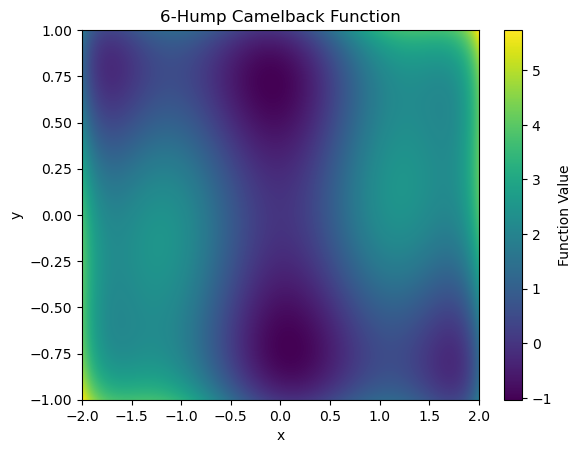

Found local minimum at: x=-1.7036066577970266, y=0.7960837392637108, value=-0.21546382438335165
Found local minimum at: x=-0.089842023474341, y=0.712656407410007, value=-1.0316284534898768
Found local minimum at: x=0.08984201020477524, y=-0.7126564216963296, value=-1.0316284534898743
Found local minimum at: x=1.703606636190495, y=-0.796083754003661, value=-0.21546382438325917
Global minimum: x=-0.089842023474341, y=0.712656407410007, value=-1.0316284534898768
Found local minimum at: x=-0.08985145273780815, y=0.7126653796314092, value=-1.031628452567338


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Define the six-hump camelback function
def f(params): # Only one argument because the function you want to minimize must accept a single argument, typically a vector of parameters (e.g., [x, y]), rather than separate x and y arguments.See documentation!
    x, y = params
    return ((4 - 2.1*x**2 + x**4/3) * x**2 + x*y + (4*y**2 - 4) * y**2)

# Create a grid over the range of x and y values
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the function values on the grid
Z = f((X, Y))

# Plot using imshow for a 2D heatmap of the function
plt.imshow(Z, extent=(-2, 2, -1, 1), aspect='auto', origin = 'lower')
plt.colorbar(label="Function Value")
plt.title("6-Hump Camelback Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Use scipy.optimize.minimize(), optionally trying out several of its methods

# Initial guesses for local minima (random examples based on visual inspection)
initial_guesses = [(-1.75,0.75),(0,0.75),(0,-0.75),(1.75,-0.75)]

# List to store local minima results
local_minima = []

for guess in initial_guesses:
    result = opt.minimize(f, guess, method='BFGS') # method is the type of solver: look at documentation, there's many
    if result.success: #optimizer exited successfully it's an important attribute of the result (again, look at documentation)
        local_minima.append((result.x[0], result.x[1], result.fun)) #result.x is the solution array, result.fun is the value of the objective function at x
        print(f"Found local minimum at: x={result.x[0]}, y={result.x[1]}, value={result.fun}")
    else:
        print(f"Minimization failed for starting point {guess}")

# Identifying the global minimum (minimal function value)
global_minimum = min(local_minima, key=lambda x: x[2])
print(f"Global minimum: x={global_minimum[0]}, y={global_minimum[1]}, value={global_minimum[2]}")

#Let's see what happens for (0,0) as initial guess
result_00 = opt.minimize(f,(0,0), method = 'Nelder-Mead')
if result.success: 
    print(f"Found local minimum at: x={result_00.x[0]}, y={result_00.x[1]}, value={result_00.fun}")
else: 
    print("Minimization failed for starting point (0,0)")

In [97]:
# Let's try to do this again, varying more systematically the initial guesses so that I can find more accurately the number of local minima
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Define the six-hump camelback function
def f(params):
    x, y = params
    return ((4 - 2.1*x**2 + x**4/3) * x**2 + x*y + (4*y**2 - 4) * y**2)

# Create a grid of initial guesses to sample the domain
x_vals = np.linspace(-2, 2, 40)  # 20 points for x
y_vals = np.linspace(-1, 1, 40)  # 10 points for y
initial_guesses = [(x, y) for x in x_vals for y in y_vals]  # Create all combinations of (x, y) from the grid

# List to store local minima results
local_minima = []
tolerance_distance = 1e-5  # A small tolerance for considering close minima as the same one

# Function to check if a point is very close to an already found minimum (based on (x, y) distance)
def is_close(minima, new_minimum):
    for minimum in minima:
        # Calculate the Euclidean distance between the (x, y) values
        distance = np.sqrt((minimum[0] - new_minimum[0])**2 + (minimum[1] - new_minimum[1])**2)
        if distance < tolerance_distance:  # If the distance between coordinates is too small, consider them close
            return True
    return False

# Run optimization from each initial guess
for guess in initial_guesses:
    result = opt.minimize(f, guess, method='BFGS') 
    if result.success:
        new_minimum = (result.x[0], result.x[1], result.fun)
        # Only add the new minimum if it's not too close to any existing minima
        if not is_close(local_minima, new_minimum):
            local_minima.append(new_minimum)
            print(f"Found local minimum at: x={result.x[0]}, y={result.x[1]}, value={result.fun}")
    else:
        print(f"Minimization failed for starting point {guess}")

# After exploration, count the number of found local minima
num_local_minima = len(local_minima)
print(f"Number of unique local minima found: {num_local_minima}")

# Identifying the global minimum (minimal function value)
global_minimum = min(local_minima, key=lambda x: x[2])
print(f"Global minima: x={global_minimum[0]}, y={global_minimum[1]}, value={global_minimum[2]}")


Found local minimum at: x=0.08984183948297911, y=-0.7126562813168629, value=-1.0316284534896596
Found local minimum at: x=-0.08984172710844227, y=0.7126562313109566, value=-1.031628453489366
Found local minimum at: x=1.7036066976073423, y=-0.7960835751381429, value=-0.21546382438371192
Found local minimum at: x=-1.7036068000456357, y=0.7960837096469677, value=-0.21546382438343903
Found local minimum at: x=-1.6071044477637073, y=-0.5686518662558079, value=2.104250310312219
Found local minimum at: x=1.6071047829621314, y=0.5686514463531251, value=2.1042503103112624
Number of unique local minima found: 6
Global minimum: x=0.08984183948297911, y=-0.7126562813168629, value=-1.0316284534896596


There are as expected 6 local minima, two of which are global minima. 
As we've seen in the previous code though, if I start exactly at (0,0), it will be considered as a minimum, even tho it's a saddle point. This is why: \
when you minimize a function using numerical optimization methods like `scipy.optimize.minimize()`, the result depends on the specific algorithm and how the algorithm explores the function landscape. Even though mathematically, (0, 0) is a saddle point based on the Hessian (which suggests zero curvature along one direction and negative curvature along another), the optimizer could behave differently depending on various factors, such as:

1. **Precision of numerical methods**: The Hessian matrix computation (especially for second derivatives) can be influenced by numerical precision and might not capture subtle details of the function's curvature exactly at (0, 0). Sometimes, floating-point approximations can cause the optimizer to treat a point with a zero or very small eigenvalue as a local minimum, especially if the algorithm does not detect the saddle nature.

2. **Start of the optimization**: When you start the optimization at (0, 0), the optimization process might consider it as a low point relative to its neighboring region due to the nature of the cost function near (0, 0). Since the optimizer seeks to minimize the function and (0, 0) might be the best (lowest) point it finds in the immediate neighborhood of the initial guess, it returns that as a minimum, even if it is technically a saddle point in the broader global context.

3. **Convergence to a local minimum**: Some optimization algorithms can get stuck in a local minimum even if it's a saddle. Specifically, the algorithm you used (`BFGS` in this case) may converge to a point where the gradient is nearly zero. If there's no nearby better point in the immediate vicinity, it can incorrectly classify (0, 0) as a local minimum, because the method is designed to stop when it reaches a stationary point where the gradient vanishes or becomes sufficiently small.

4. **Global behavior vs. local exploration**: The `BFGS` algorithm optimizes locally and uses gradients to find the direction in which the function decreases the fastest. However, for a saddle point, the function may have very flat areas (which don't move much in one direction but steeply drop in another), causing the algorithm to get "stuck" and treat this point as a minimum despite its saddle nature.
By "steeply drop," I mean that along one direction, the function decreases (or increases) very quickly, indicating a region where the function is curving sharply. This contrasts with regions where the function has a flat or shallow slope, where changes in the function's value are minimal even with a significant change in the variables.
In the context of a saddle point like (0, 0) in the six-hump camelback function, there are typically two directions to consider:
1. **Direction of negative curvature**: Along one axis (e.g., in the \(y\)-direction or a combination of \(x\) and \(y\)), the function might have a "steep drop," meaning that if you move slightly away from the point in that direction, the function value decreases sharply. This indicates a minimum along that direction.
2. **Direction of positive curvature**: In another direction (typically perpendicular to the first one), the function might have a steep increase, indicating a "hill" or a maximum in that direction. However, at the saddle point, this might not be immediately apparent because the gradient (or slope) is close to zero along some directions.
At a saddle point, the curvature in one direction is negative (i.e., the function is decreasing steeply along that direction), and in the perpendicular direction, the curvature is positive (i.e., the function is increasing steeply).
In simpler terms: "Steeply drop" means that if you move in certain directions, the function's value will decrease very quickly, showing a sharp decline.
In summary, the reason you're finding (0, 0) as a minimum in the optimization results, even though it's a saddle mathematically, could be a combination of numerical errors, local search behavior, and algorithm-specific characteristics. Optimizers like `BFGS` may incorrectly classify saddle points as minima, especially if they have very shallow gradients along some directions.

If indeed you use for example 'Nelder-Mead' you don't have that problem any longer. 

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

    year     hare     lynx  carrot
0   1900  30000.0   4000.0   48300
1   1901  47200.0   6100.0   48200
2   1902  70200.0   9800.0   41500
3   1903  77400.0  35200.0   38200
4   1904  36300.0  59400.0   40600
5   1905  20600.0  41700.0   39800
6   1906  18100.0  19000.0   38600
7   1907  21400.0  13000.0   42300
8   1908  22000.0   8300.0   44500
9   1909  25400.0   9100.0   42100
10  1910  27100.0   7400.0   46000
11  1911  40300.0   8000.0   46800
12  1912  57000.0  12300.0   43800
13  1913  76600.0  19500.0   40900
14  1914  52300.0  45700.0   39400
15  1915  19500.0  51100.0   39000
16  1916  11200.0  29700.0   36700
17  1917   7600.0  15800.0   41800
18  1918  14600.0   9700.0   43300
19  1919  16200.0  10100.0   41300
20  1920  24700.0   8600.0   47300
Hare dominant frequency: 0.05 1/years
Lynx dominant frequency: 0.05 1/years
Hare dominant period: 21.00 years
Lynx dominant period: 21.00 years


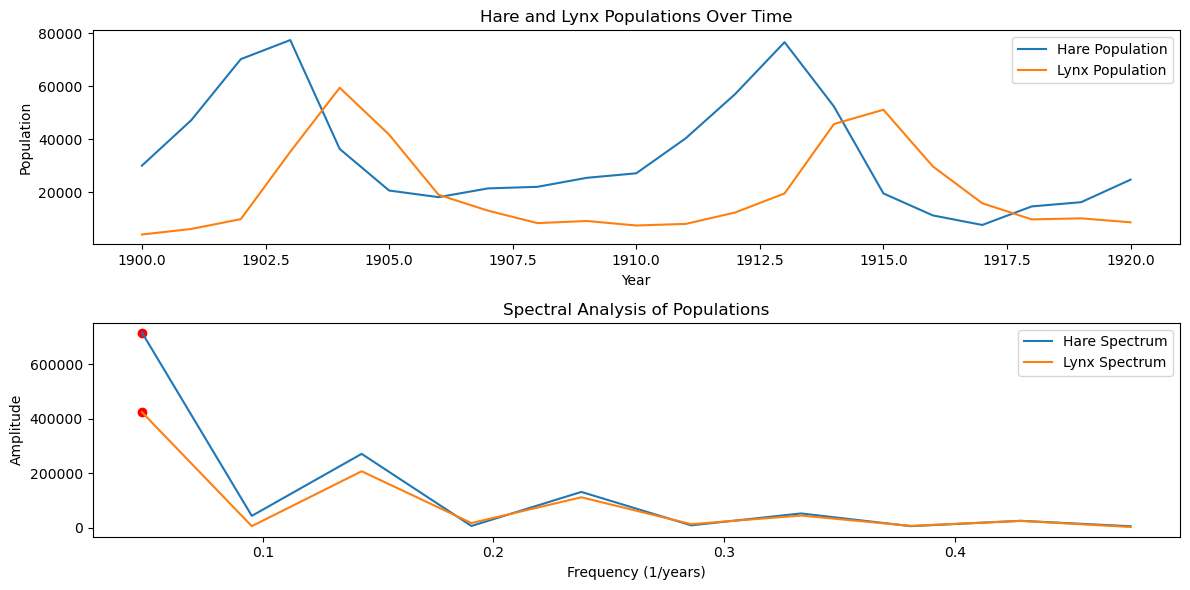

In [14]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

data = pd.read_csv('populations.txt', delimiter = '\t')
data.columns = data.columns.str.lstrip('# ')# Clean the column names by removing #
print(data)
#print(data.columns)

# Performe a periodicity analysis on the lynxs-hares population
hares = data['hare']
lynxes = data['lynx']

# Compute FFT and frequencies
hare_fft = np.fft.fft(hares)
lynx_fft = np.fft.fft(lynxes)
frequencies = np.fft.fftfreq(len(hares), d=1)  # Assuming annual data, so d=1 year

# Keep only the positive frequencies for analysis
positive_freq = frequencies[frequencies > 0]
hare_amplitudes = np.abs(hare_fft[:len(positive_freq)]) 
lynx_amplitudes = np.abs(lynx_fft[:len(positive_freq)])

# Find the dominant frequency
hare_peak_idx = np.argmax(hare_amplitudes) #returns indices of peak
lynx_peak_idx = np.argmax(lynx_amplitudes)

hare_dominant_period = 1 / positive_freq[hare_peak_idx]
lynx_dominant_period = 1 / positive_freq[lynx_peak_idx]

print(f"Hare dominant frequency: {positive_freq[hare_peak_idx]:.2f} 1/years")
print(f"Lynx dominant frequency: {positive_freq[lynx_peak_idx]:.2f} 1/years")

print(f"Hare dominant period: {hare_dominant_period:.2f} years")
print(f"Lynx dominant period: {lynx_dominant_period:.2f} years")

# Plot the results
plt.figure(figsize=(12, 6))

# Time series
plt.subplot(2, 1, 1) #sublot with 2 rows, one column, and now activate the first row
plt.plot(data['year'], hares, label='Hare Population')
plt.plot(data['year'], lynxes, label='Lynx Population')
plt.title('Hare and Lynx Populations Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

# Spectral analysis
plt.subplot(2, 1, 2) #now activate the second row in the subplot
plt.plot(positive_freq, hare_amplitudes, label='Hare Spectrum')
plt.plot(positive_freq, lynx_amplitudes, label='Lynx Spectrum')
plt.scatter(positive_freq[hare_peak_idx], hare_amplitudes[hare_peak_idx], color = 'red')
plt.scatter(positive_freq[lynx_peak_idx], lynx_amplitudes[lynx_peak_idx], color = 'red')
plt.title('Spectral Analysis of Populations')
plt.xlabel('Frequency (1/years)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

#### 1. **Why Take Positive Frequencies Only?**
   - **Symmetry in FFT Output**: The FFT of a real-valued time series (like the population data) produces a symmetric result:
     - The first half of the result represents the positive frequencies.
     - The second half represents negative frequencies, which are just mirror images of the positive frequencies due to the Hermitian symmetry of the FFT for real-valued inputs.
   - Since the data and phenomena of interest are physical and time-domain (not complex), the negative frequencies are redundant. Hence, we focus on the positive frequencies.

---

#### 2. **Why Take the Absolute Value for Amplitudes?**
   - **Complex Output**: The FFT generally returns complex numbers, where each value has a real and an imaginary part. These represent both the magnitude (amplitude) and phase of the frequency components.
   - **Amplitude Significance**: We’re often interested in the **strength** of the signal at each frequency, which is given by the amplitude:
     $
     \text{Amplitude} = |X| = \sqrt{\text{Re}(X)^2 + \text{Im}(X)^2}
     $
     Here, $\text{Re}(X)$ and $\text{Im}(X)$ are the real and imaginary parts of the FFT output.
   - For periodicity analysis, the phase is usually not relevant, so we use $|X|$ (magnitude) to evaluate how much "power" exists at each frequency.

---

#### 3. **Why Find the Dominant Frequency and Period?**
   - **Periodic Behavior in Populations**:
     - Biological systems like hare-lynx populations often exhibit cyclic patterns driven by predator-prey dynamics or other ecological factors. 
     - The dominant frequency corresponds to the most pronounced cycle or oscillation in the data.
   - **Period's Ecological Importance**:
     - The reciprocal of the dominant frequency (period) tells us how long, on average, it takes for the population to complete one full oscillation (e.g., a boom and bust cycle).
     - For example, knowing that the lynx population peaks every \(9\) years could help in understanding and predicting population dynamics.
   - **Validation and Insights**:
     - If the periodic behavior matches theoretical predictions or historical observations, it validates the model and suggests robustness in the underlying dynamics.
     - For predator-prey interactions, a clear periodicity can indicate that the system behaves predictably within a given range of conditions.

---

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pyplot.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

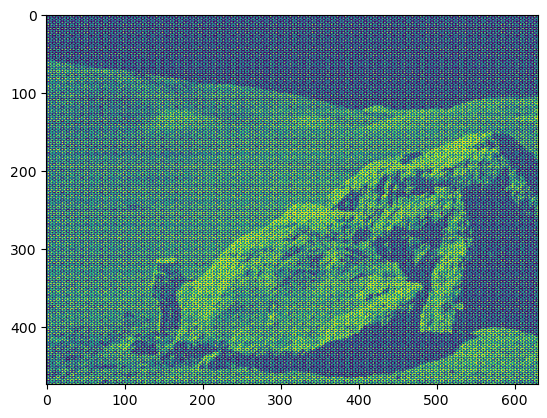

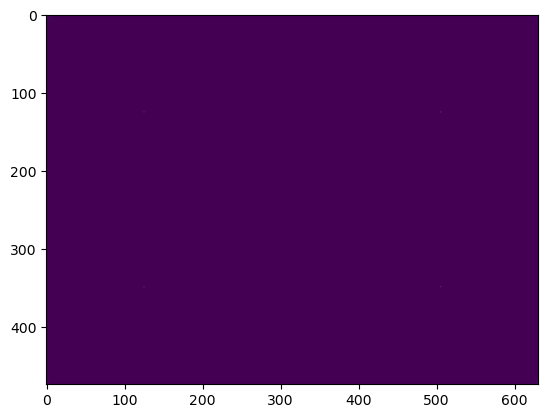

In [33]:
# Load the image using pylab.imread()
image = plt.imread('moonlanding.png')
plt.imshow(image)
plt.show()
#print(data)

# Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image
from scipy.fftpack import fft2 
fft_image = fft.fft2(image)
plt.imshow(np.abs(fft_image))

#Do you have any trouble visualising the spectrum? If so, why?
#Yes, I see a uniform dark purple image. See below for explanation. 


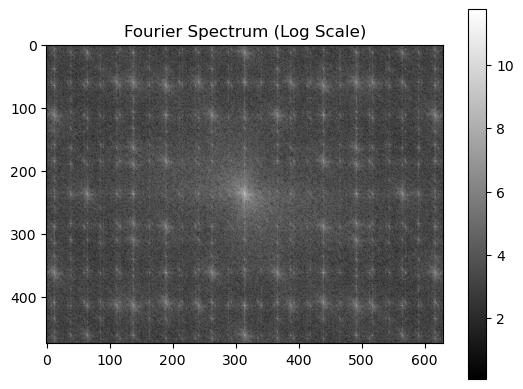

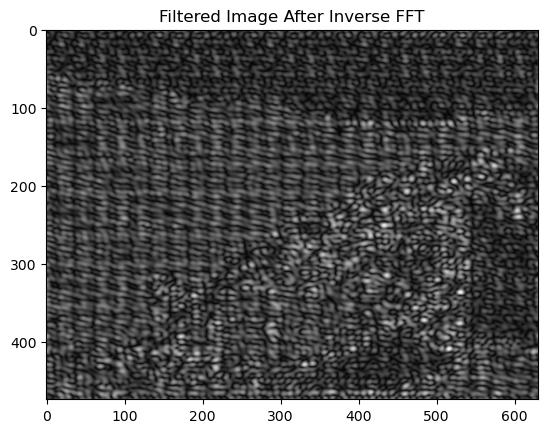

In [32]:
#Let's make it better

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift, ifft2

# Load the image
image = plt.imread('moonlanding.png')

# Step 1: Compute the 2D FFT
fft_image = fft2(image)

# Step 2: Shift the zero-frequency component to the center
fft_image_shifted = fftshift(fft_image)

# Step 3: Visualize the magnitude of the Fourier transform (log scale for better contrast)
spectrum_magnitude = np.log(1 + np.abs(fft_image_shifted))

# Plot the Fourier spectrum
plt.imshow(spectrum_magnitude, cmap='gray')
plt.colorbar()
plt.title('Fourier Spectrum (Log Scale)')
plt.show()

# Step 4: Set high-frequency components to zero (low-pass filter)
# Set a threshold (e.g., by radius) and filter out high-frequency parts
rows, cols = image.shape
center_x, center_y = rows // 2, cols // 2
radius = 50  # radius around the center to keep

# Create a mask to zero out frequencies beyond the cutoff radius
y, x = np.ogrid[:rows, :cols]
mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2

# Apply the mask
fft_image_shifted[~mask] = 0

# Step 5: Apply inverse FFT to reconstruct the image with filtered frequencies
fft_image_filtered = np.fft.ifftshift(fft_image_shifted)  # Inverse shift to original layout
filtered_image = np.abs(ifft2(fft_image_filtered))

# Plot the filtered (reconstructed) image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image After Inverse FFT')
plt.show()


#### Why Do You See a Uniform Image?

The main reason you see a uniform, dark purple image when you attempt to visualize the Fourier transform is likely because of **high dynamic range** in the Fourier coefficients. When plotting the absolute values of the Fourier transformed image, the contrast can often be so high that fine details (such as the real structure of the image in the frequency domain) become compressed and not visually distinguishable. That’s why the image appears mostly uniform.

#### Understanding the Spectrum:
- **High Frequencies (Noise)**: The high-frequency components of the Fourier spectrum usually contain details like edges or sharp variations (noise). These components vary rapidly and can have much smaller magnitudes than the low-frequency components.
  
- **Low Frequencies (Image Structure)**: The low frequencies are where most of the main, smooth structures of the image (i.e., general shapes, background color, overall contrast) are captured.

So, to make the visualization clearer, we need to either:
1. **Scale** the frequency components to bring out their differences (using a logarithmic scale).
2. **Filter** out the high-frequency noise and visualize just the lower frequencies, which hold the main structure of the image.

#### The Idea Behind Removing High-Frequency Components:
The comment in your code mentions setting **some of the high-frequency components to zero**. This is a form of **low-pass filtering**, where you remove (or reduce) high-frequency noise while retaining the essential structure of the image (captured by the low frequencies).

---

### Here's how to proceed:

1. **Compute the 2D Fourier transform** of the image.
2. **Shift** the Fourier image to center the zero-frequency component for better visualization.
3. **Apply logarithmic scaling** to better capture the spectral range.
4. **Set high frequencies to zero** by slicing the Fourier image.
5. **Apply the inverse Fourier transform** to reconstruct the image, but now with less noise.


### Key Steps:
1. **Shifting the Zero-Frequency Component**: `fftshift()` moves the low frequencies (average intensity) to the center.
2. **Logarithmic Scaling**: `np.log(1 + np.abs(fft_image_shifted))` helps improve visualization by compressing the dynamic range of the frequency magnitudes.
3. **Filtering the High Frequencies**: A **circular mask** is applied to zero out high-frequency components that represent noise. You can adjust `radius` to control how much of the low-frequency structure is kept.
4. **Inverse Fourier Transform**: `ifft2()` is used to convert the filtered frequency data back into an image. The magnitude is taken (`np.abs()`) because the inverse FFT gives complex values.

### Expected Results:
- **Fourier Spectrum**: You’ll see the spectrum with the low frequencies in the center and a logarithmic contrast enhancement.
- **Filtered Image**: After removing high frequencies, you should see a blurred or smoothed version of the original image. This gives you the main structure of the image while removing finer, high-frequency details.
